## Car Price Prediction

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [159]:
#import all libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#### Reading the data:

In [3]:
cars_data = pd.read_csv('CarPrice_Assignment.csv')
cars_data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
#shape of the data
cars_data.shape

(205, 26)

In [5]:
#info the dataframe
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
#describe the data
cars_data.describe(percentiles = [0.10,0.25,0.50,0.75,0.90,0.99])

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
10%,21.400000,-1.000000,93.700000,157.300000,63.800000,50.600000,1947.000000,91.000000,2.970000,2.882000,8.000000,68.000000,4500.000000,17.000000,23.000000,6657.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
90%,184.600000,3.000000,107.900000,188.800000,68.640000,56.620000,3230.000000,181.000000,3.672000,3.540000,10.940000,160.000000,5780.000000,31.600000,38.000000,22563.000000
99%,202.960000,3.000000,115.544000,202.480000,71.700000,59.100000,3948.000000,302.160000,3.800000,3.900000,23.000000,207.000000,6000.000000,44.720000,49.880000,40802.720000


#### Data Cleaning:

In [7]:
cars_data.duplicated(subset = ['car_ID']).sum()

0

No duplicate records.

In [8]:
cars_data = cars_data.drop(['car_ID'], axis =1)

In [9]:
cars_data.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
#symboling column- Its assigned insurance risk rating, 
#A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
cars_data['symboling'].value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

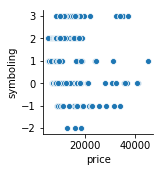

In [11]:
sns.pairplot(y_vars = 'symboling', x_vars = 'price' ,data = cars_data)

In [12]:
#Column CarName
cars_data['CarName'].value_counts()

peugeot 504                        6
toyota corolla                     6
toyota corona                      6
subaru dl                          4
mitsubishi g4                      3
mazda 626                          3
mitsubishi outlander               3
mitsubishi mirage g4               3
toyota mark ii                     3
honda civic                        3
nissan rogue                       2
mazda glc                          2
volkswagen dasher                  2
volvo 244dl                        2
volvo 144ea                        2
mazda rx-7 gs                      2
saab 99gle                         2
toyota corolla 1200                2
isuzu D-Max                        2
nissan clipper                     2
plymouth fury iii                  2
volvo 145e (sw)                    2
toyota starlet                     2
honda civic cvcc                   2
saab 99e                           2
volvo 264gl                        2
honda accord                       2
b

We see that CarName is comprised of two parts - the first word is the name of 'car company' and the second is the 'car model'. 

In [13]:
cars_data['car_company'] = cars_data['CarName'].apply(lambda x:x.split(' ')[0])

In [14]:
#rechecking
cars_data.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,car_company
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [15]:
#deleting the original column
cars_data = cars_data.drop(['CarName'], axis =1)

In [16]:
cars_data['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
renault         2
maxda           2
mercury         1
Nissan          1
vokswagen       1
porcshce        1
toyouta         1
Name: car_company, dtype: int64

We see some spelling mistakes in the data.

In [17]:
cars_data['car_company'].replace('toyouta', 'toyota',inplace=True)
cars_data['car_company'].replace('Nissan', 'nissan',inplace=True)
cars_data['car_company'].replace('maxda', 'mazda',inplace=True)
cars_data['car_company'].replace('vokswagen', 'volkswagen',inplace=True)
cars_data['car_company'].replace('vw', 'volkswagen',inplace=True)
cars_data['car_company'].replace('porcshce', 'porsche',inplace=True)

In [18]:
#rechecking the data:
cars_data['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [19]:
# fueltype - Car fuel type i.e gas or diesel
cars_data['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [20]:
#aspiration - Aspiration used in a car
cars_data['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [21]:
#doornumber - Number of doors in a car
cars_data['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form.

In [22]:
def number_(x):
    return x.map({'four':4, 'two': 2})
    
cars_data['doornumber'] = cars_data[['doornumber']].apply(number_)

In [23]:
#rechecking
cars_data['doornumber'].value_counts()

4    115
2     90
Name: doornumber, dtype: int64

In [24]:
#carbody- body of car
cars_data['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [25]:
#drivewheel - type of drive wheel
cars_data['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [26]:
#enginelocation - Location of car engine
cars_data['enginelocation'].value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

In [27]:
#wheelbase - Weelbase of car 
cars_data['wheelbase'].value_counts().head()

94.5    21
93.7    20
95.7    13
96.5     8
98.4     7
Name: wheelbase, dtype: int64

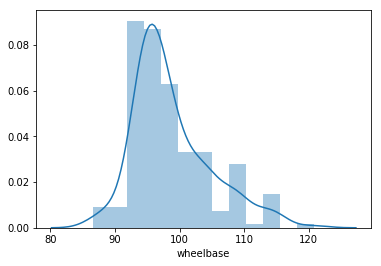

In [28]:
sns.distplot(cars_data['wheelbase'])
plt.show()

In [29]:
#carlength - Length of car
cars_data['carlength'].value_counts().head()

157.3    15
188.8    11
166.3     7
171.7     7
186.7     7
Name: carlength, dtype: int64

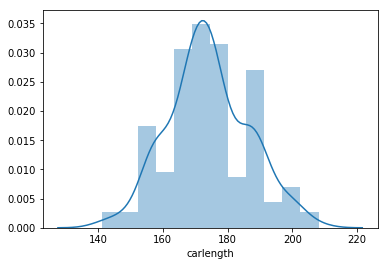

In [30]:
sns.distplot(cars_data['carlength'])
plt.show()

In [31]:
#enginetype - Type of engine.
cars_data['enginetype'].value_counts()

ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

In [32]:
#cylindernumber- cylinder placed in the car
cars_data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

As there are numbers, let us convert these numbers into numeric form.

In [33]:
def convert_number(x):
    return x.map({'two':2, 'three':3, 'four':4,'five':5, 'six':6,'eight':8,'twelve':12})

cars_data['cylindernumber'] = cars_data[['cylindernumber']].apply(convert_number)

In [34]:
#re-checking
cars_data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
12      1
3       1
Name: cylindernumber, dtype: int64

In [35]:
#fuelsystem - Fuel system of car
cars_data['fuelsystem'].value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

We have almost looked into most of the column individually. Now let us explore data visulaization to look for any patterns. 

#### Data Visulaization:

In [36]:
cars_numeric = cars_data.select_dtypes(include =['int64','float64'])
cars_numeric.head()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,2,88.6,168.8,64.1,48.8,2548,4,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,2,94.5,171.2,65.5,52.4,2823,6,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,99.8,176.6,66.2,54.3,2337,4,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,4,99.4,176.6,66.4,54.3,2824,5,136,3.19,3.40,8.0,115,5500,18,22,17450.0


<Figure size 2160x2160 with 0 Axes>

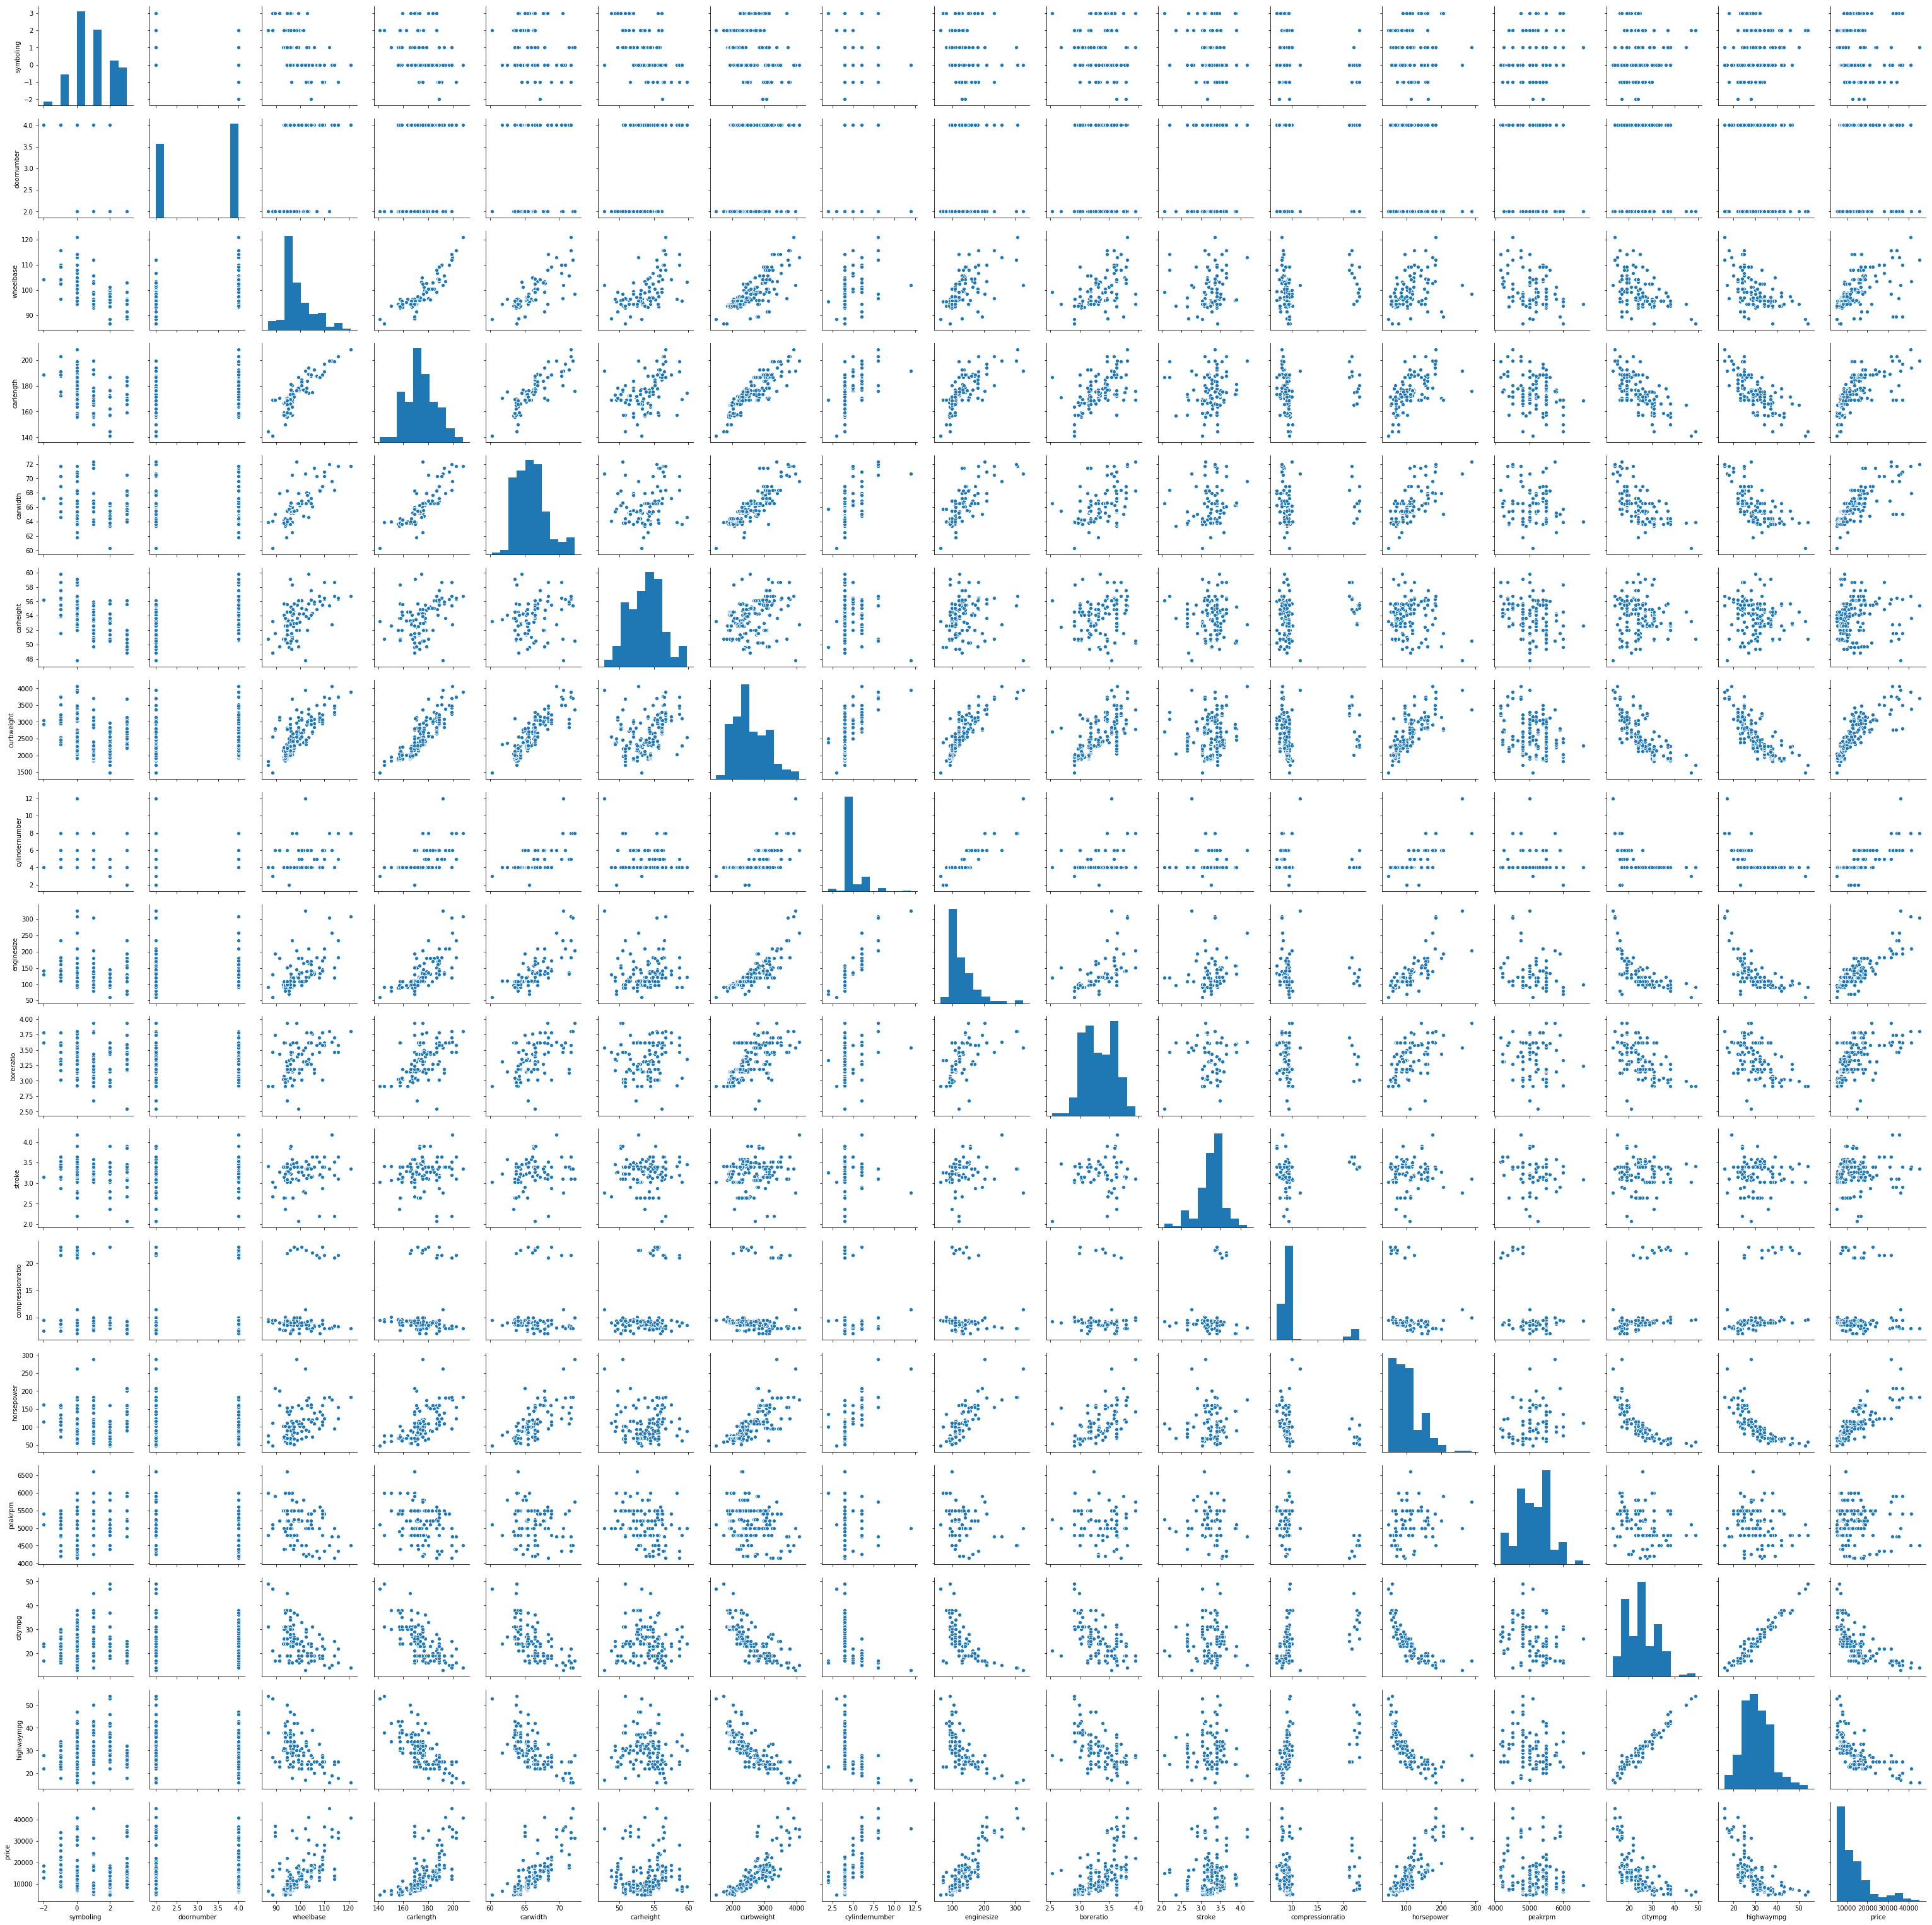

In [37]:
plt.figure(figsize = (30,30))
sns.pairplot(cars_numeric)
plt.show()

As there are lot of columns- we can't make out really much from above graph. Let us check the correlation.

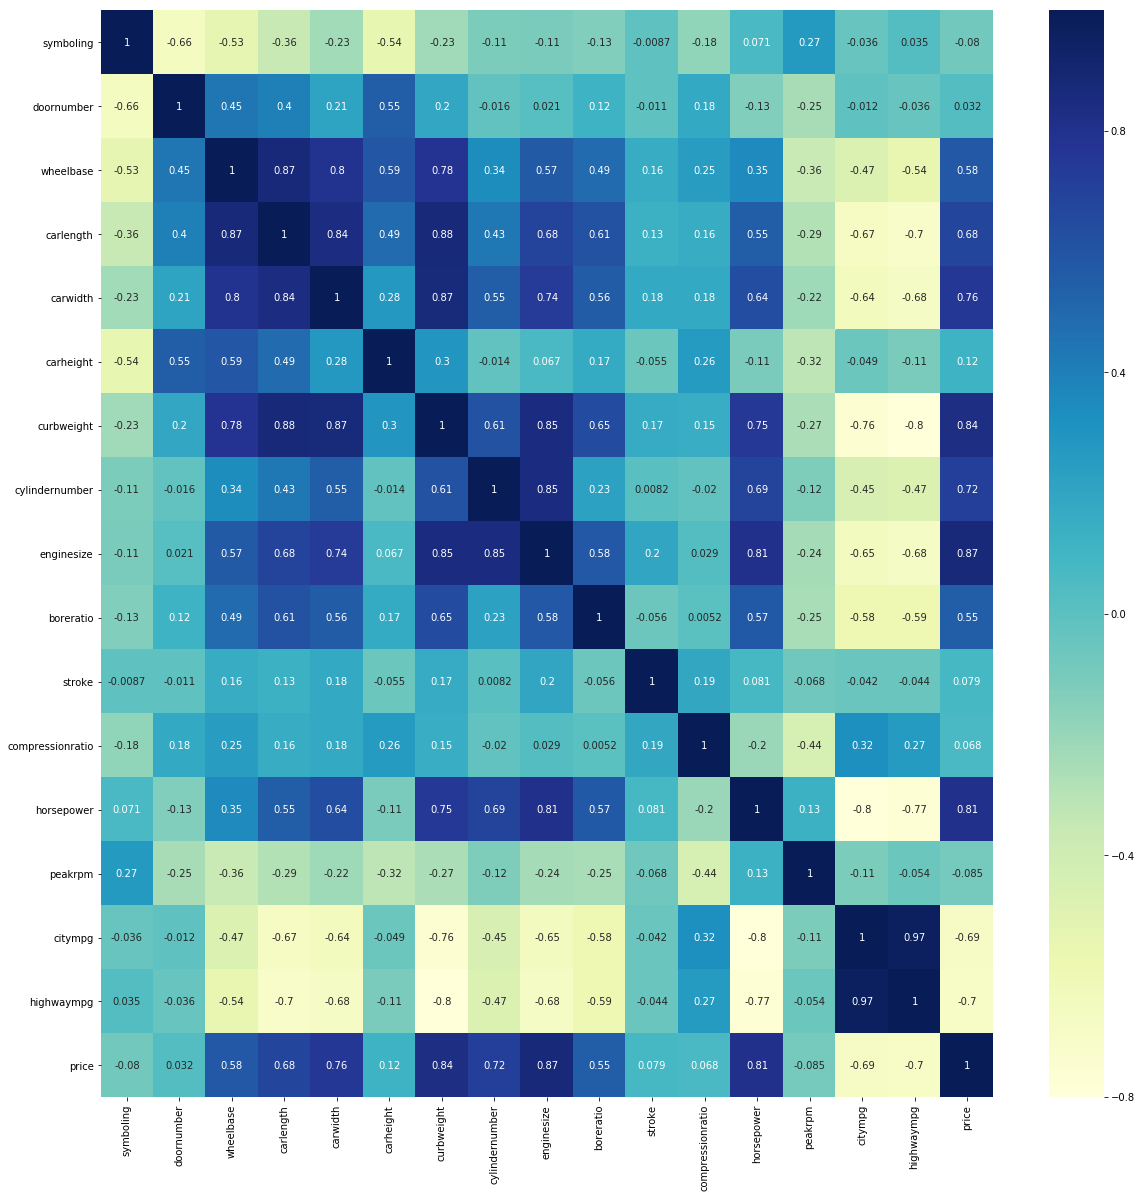

In [43]:
plt.figure(figsize = (20,20))
sns.heatmap(cars_data.corr(), annot = True ,cmap = 'YlGnBu')
plt.show()

- Price is highly (positively) correlated with wheelbase, carlength, carwidth, curbweight, enginesize, horsepower.

- Price is negatively correlated to symboling, citympg and highwaympg.
- This suggest that cars having high mileage may fall in the 'economy' cars category, and are priced lower.

- There are many independent variables which are highly correlated: wheelbase, carlength, curbweight, enginesize etc.. all are positively correlated.

In [45]:
categorical_cols = cars_data.select_dtypes(include = ['object'])
categorical_cols.head()

,fueltype,aspiration,carbody,drivewheel,enginelocation,enginetype,fuelsystem,car_company
0,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
1,gas,std,convertible,rwd,front,dohc,mpfi,alfa-romero
2,gas,std,hatchback,rwd,front,ohcv,mpfi,alfa-romero
3,gas,std,sedan,fwd,front,ohc,mpfi,audi
4,gas,std,sedan,4wd,front,ohc,mpfi,audi


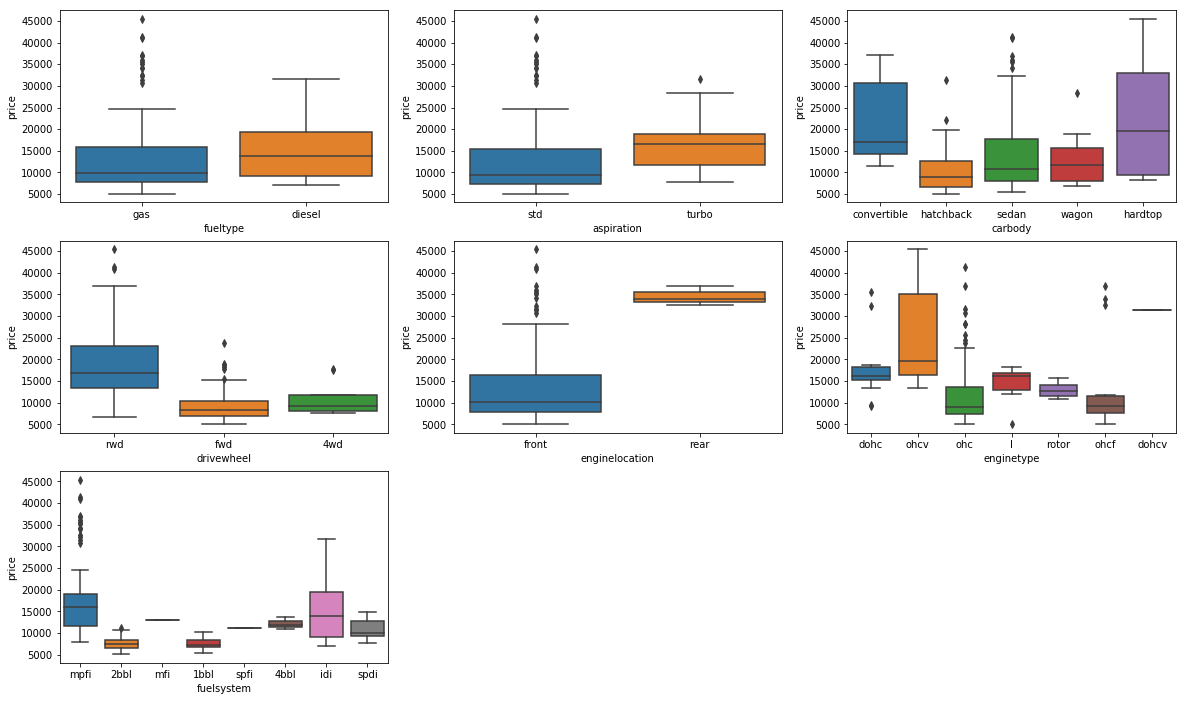

In [57]:
plt.figure(figsize = (20,12))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = cars_data)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = cars_data)
plt.subplot(3,3,3)
sns.boxplot(x = 'carbody', y = 'price', data = cars_data)
plt.subplot(3,3,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = cars_data)
plt.subplot(3,3,5)
sns.boxplot(x = 'enginelocation', y = 'price', data = cars_data)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginetype', y = 'price', data = cars_data)
plt.subplot(3,3,7)
sns.boxplot(x = 'fuelsystem', y = 'price', data = cars_data)

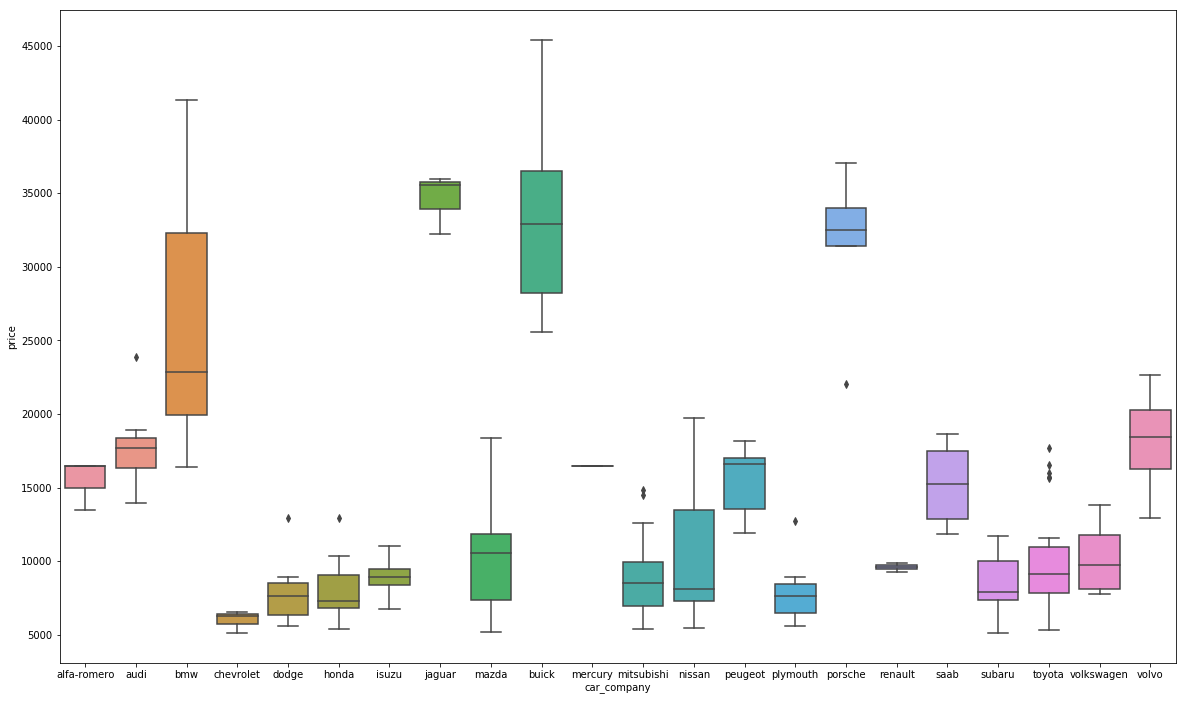

In [58]:
plt.figure(figsize = (20,12))
sns.boxplot(x = 'car_company', y = 'price', data = cars_data)

    1.From the price boxplot it is clear that The brands with the most expensive vehicles in the dataset belong to Bmw,Buick,Jaguar and porsche.
    2. Whereas the lower priced cars belong to chevrolet
    3. The median price of gas vehicles is lower than that of Diesel Vehicles.
    4. 75th percentile of standard aspirated vehicles have a price lower than the median price of turbo aspirated vehicles. 
    5. Two and four Door vehicles are almost equally priced. There are however some outliers in the price of 
    two-door vehicles. 
    6. Hatchback vehicles have the lowest median price of vehicles in the data set whereas hardtop vehicles have 
    the highest median price.
    7. The price of vehicles with rear placed engines is significantly higher than the price of vehicles with front 
    placed engines. 
    8. Almost all vehicles in the dataset have engines placed in the front of the vehicle. However, the price of 
    vehicles with rear placed engines is significantly higher than the price of vehicles with front placed engines. 
    9. The median cost of eight cylinder vehicles is higher than other cylinder categories.
    10. It is clear that vehicles Multi-port Fuel Injection [MPFI] fuelsystem have the highest median price. There are 
    also some outliers on the higher price side having MPFI systems.
    11. Vehicles with OHCV engine type falls under higher price range.

#### Data preparation:

In [59]:
#creating dummies
cars_dummies = pd.get_dummies(categorical_cols, drop_first = True)
cars_dummies.head()

,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
car_df  = pd.concat([cars_data, cars_dummies], axis =1)

In [67]:
car_df = car_df.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation',
       'enginetype', 'fuelsystem', 'car_company'], axis =1)

In [68]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 60 columns):
symboling                 205 non-null int64
doornumber                205 non-null int64
wheelbase                 205 non-null float64
carlength                 205 non-null float64
carwidth                  205 non-null float64
carheight                 205 non-null float64
curbweight                205 non-null int64
cylindernumber            205 non-null int64
enginesize                205 non-null int64
boreratio                 205 non-null float64
stroke                    205 non-null float64
compressionratio          205 non-null float64
horsepower                205 non-null int64
peakrpm                   205 non-null int64
citympg                   205 non-null int64
highwaympg                205 non-null int64
price                     205 non-null float64
fueltype_gas              205 non-null uint8
aspiration_turbo          205 non-null uint8
carbody_hardtop         

#### Spliting the data into test and train

In [71]:
df_train, df_test = train_test_split(car_df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [72]:
df_train.shape

(143, 60)

In [73]:
df_test.shape

(62, 60)

#### Rescaling the data:

In [75]:
cars_numeric.columns

Index(['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
       'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'],
      dtype='object')

In [83]:
col_list = ['symboling', 'doornumber', 'wheelbase', 'carlength', 'carwidth','carheight', 'curbweight', 'cylindernumber', 'enginesize', 'boreratio',
            'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']

In [80]:
scaler = StandardScaler()

In [84]:
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [85]:
df_train.describe()

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,...,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,1.430000e+02,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,5.473477e-17,9.006005e-17,1.538785e-15,2.003060e-16,-4.093074e-15,5.450186e-16,-1.894367e-16,-3.726623e-16,-4.308908e-17,-1.059758e-15,...,0.097902,0.055944,0.027972,0.020979,0.013986,0.020979,0.076923,0.139860,0.048951,0.041958
std,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,1.003515e+00,...,0.298227,0.230621,0.165472,0.143818,0.117845,0.143818,0.267406,0.348061,0.216524,0.201198
min,-2.347020e+00,-1.126872e+00,-2.006930e+00,-2.574223e+00,-2.510760e+00,-2.371619e+00,-1.937401e+00,-2.084351e+00,-1.566427e+00,-2.412359e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.689008e-01,-1.126872e+00,-6.771770e-01,-6.186702e-01,-8.565171e-01,-7.222984e-01,-7.711028e-01,-3.514313e-01,-6.847340e-01,-9.320600e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.701590e-01,8.874120e-01,-3.405307e-01,-1.128552e-01,-1.993522e-01,6.112865e-02,-2.478347e-01,-3.514313e-01,-3.663447e-01,9.948427e-03,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.701590e-01,8.874120e-01,4.505882e-01,7.076008e-01,4.804736e-01,7.414732e-01,7.203955e-01,-3.514313e-01,3.928914e-01,8.942829e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.848278e+00,8.874120e-01,2.874442e+00,2.324616e+00,2.927846e+00,2.287711e+00,2.812547e+00,6.580247e+00,4.923816e+00,2.432256e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Model building:

In [86]:
y_train = df_train.pop('price')
X_train = df_train

#### Model building using RFE

In [95]:
lr = LinearRegression()
lr.fit(X_train,y_train)

# Subsetting training data for 15 selected columns
rfe = RFE(lr,15)
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [110]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 41),
 ('doornumber', False, 38),
 ('wheelbase', False, 27),
 ('carlength', False, 30),
 ('carwidth', True, 1),
 ('carheight', False, 25),
 ('curbweight', False, 17),
 ('cylindernumber', False, 31),
 ('enginesize', True, 1),
 ('boreratio', False, 18),
 ('stroke', False, 32),
 ('compressionratio', True, 1),
 ('horsepower', False, 22),
 ('peakrpm', False, 23),
 ('citympg', False, 35),
 ('highwaympg', False, 29),
 ('fueltype_gas', True, 1),
 ('aspiration_turbo', False, 16),
 ('carbody_hardtop', False, 14),
 ('carbody_hatchback', False, 12),
 ('carbody_sedan', False, 13),
 ('carbody_wagon', False, 15),
 ('drivewheel_fwd', False, 34),
 ('drivewheel_rwd', False, 37),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 21),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 19),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 42),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 26),
 ('fuelsystem_4bbl', False, 10),
 ('fuelsystem_idi'

In [112]:
cols = X_train.columns[rfe.support_]
cols

Index(['carwidth', 'enginesize', 'compressionratio', 'fueltype_gas',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'fuelsystem_idi', 'car_company_bmw',
       'car_company_mazda', 'car_company_mitsubishi', 'car_company_peugeot',
       'car_company_renault', 'car_company_subaru'],
      dtype='object')

#### Model 1:

In [113]:
X1 = X_train[cols]
X1_sm = sm.add_constant(X1)

lr_1 = sm.OLS(y_train,X1_sm).fit()

In [114]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     114.1
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           4.59e-64
Time:                        00:20:38   Log-Likelihood:                -22.314
No. Observations:                 143   AIC:                             72.63
Df Residuals:                     129   BIC:                             114.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

All the p- values are significant. Let us check VIF.

In [115]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
4,enginelocation_rear,inf
6,enginetype_ohcf,inf
14,car_company_subaru,inf
2,compressionratio,42.32
8,fuelsystem_idi,41.28
12,car_company_peugeot,9.73
5,enginetype_l,8.99
3,fueltype_gas,4.60
0,carwidth,3.38
1,enginesize,3.30


We see that there are a few variables which have an infinite/large VIF. 
These variables aren't of use. But manually elimination is time consuming and makes the code unnecessarily long. 
So let's try and build a model with 10 features this time using RFE.

#### Building the model with 10 variables:

In [116]:
lr2 = LinearRegression()

rfe2 = RFE(lr2,10)
rfe2.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=10, step=1, verbose=0)

In [117]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('symboling', False, 46),
 ('doornumber', False, 43),
 ('wheelbase', False, 32),
 ('carlength', False, 35),
 ('carwidth', True, 1),
 ('carheight', False, 30),
 ('curbweight', False, 22),
 ('cylindernumber', False, 36),
 ('enginesize', True, 1),
 ('boreratio', False, 23),
 ('stroke', False, 37),
 ('compressionratio', False, 4),
 ('horsepower', False, 27),
 ('peakrpm', False, 28),
 ('citympg', False, 40),
 ('highwaympg', False, 34),
 ('fueltype_gas', False, 2),
 ('aspiration_turbo', False, 21),
 ('carbody_hardtop', False, 19),
 ('carbody_hatchback', False, 17),
 ('carbody_sedan', False, 18),
 ('carbody_wagon', False, 20),
 ('drivewheel_fwd', False, 39),
 ('drivewheel_rwd', False, 42),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 26),
 ('enginetype_l', True, 1),
 ('enginetype_ohc', False, 24),
 ('enginetype_ohcf', True, 1),
 ('enginetype_ohcv', False, 47),
 ('enginetype_rotor', True, 1),
 ('fuelsystem_2bbl', False, 31),
 ('fuelsystem_4bbl', False, 15),
 ('fuelsystem_id

In [119]:
supported_cols = X_train.columns[rfe2.support_]
supported_cols 

Index(['carwidth', 'enginesize', 'enginelocation_rear', 'enginetype_l',
       'enginetype_ohcf', 'enginetype_rotor', 'car_company_bmw',
       'car_company_peugeot', 'car_company_renault', 'car_company_subaru'],
      dtype='object')

#### Model 2:

In [120]:
X2 = X_train[supported_cols]
X2_sm = sm.add_constant(X2)

model_2 = sm.OLS(y_train,X2_sm).fit()

In [121]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           3.98e-64
Time:                        00:30:41   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

Model looks fine. Let us check the vif.

In [122]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,enginelocation_rear,inf
4,enginetype_ohcf,inf
9,car_company_subaru,inf
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
5,enginetype_rotor,1.14
6,car_company_bmw,1.09
8,car_company_renault,1.00


As we see, still there are columns with high VIF. Let us drop column -`car_company_subaru`.

#### Model 3:

In [123]:
X3 = X2.drop(['car_company_subaru'], axis =1)
X3_sm = sm.add_constant(X3)

Model_3 = sm.OLS(y_train,X3_sm).fit()

In [124]:
print(Model_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     144.3
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           3.98e-64
Time:                        00:34:56   Log-Likelihood:                -33.027
No. Observations:                 143   AIC:                             86.05
Df Residuals:                     133   BIC:                             115.7
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0506    

In [125]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X3.columns
vif['VIF'] = [variance_inflation_factor(X3.values, i) for i in range(X3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
7,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.21
0,carwidth,3.15
2,enginelocation_rear,1.19
5,enginetype_rotor,1.14
4,enginetype_ohcf,1.11
6,car_company_bmw,1.09
8,car_company_renault,1.00


Let us drop column -`enginetype_ohcf`.

#### Model 4:

In [126]:
X4 = X3.drop(['enginetype_ohcf'], axis =1)
X4_sm = sm.add_constant(X4)

Model_4 = sm.OLS(y_train,X4_sm).fit()

In [127]:
print(Model_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     160.8
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           8.22e-65
Time:                        00:37:38   Log-Likelihood:                -34.105
No. Observations:                 143   AIC:                             86.21
Df Residuals:                     134   BIC:                             112.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0635    

In [128]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X4.columns
vif['VIF'] = [variance_inflation_factor(X4.values, i) for i in range(X4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,car_company_peugeot,10.05
3,enginetype_l,9.49
1,enginesize,3.19
0,carwidth,3.15
4,enginetype_rotor,1.14
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
7,car_company_renault,1.00


VIF for car_company_peugeot is still high. Let us drop and rebuild the model.

#### Model 5:

In [129]:
X5 = X4.drop(['car_company_peugeot'], axis =1)
X5_sm = sm.add_constant(X5)

Model_5 = sm.OLS(y_train,X5_sm).fit()

In [130]:
print(Model_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     167.5
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           2.49e-63
Time:                        00:40:09   Log-Likelihood:                -40.550
No. Observations:                 143   AIC:                             97.10
Df Residuals:                     135   BIC:                             120.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0663    

In [131]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X5.columns
vif['VIF'] = [variance_inflation_factor(X5.values, i) for i in range(X5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.13
0,carwidth,2.89
4,enginetype_rotor,1.13
2,enginelocation_rear,1.09
5,car_company_bmw,1.09
3,enginetype_l,1.08
6,car_company_renault,1.00


Let us drop variable `enginetype_l`.

#### Model 6:

In [132]:
X6 = X5.drop(['enginetype_l'], axis =1)
X6_sm = sm.add_constant(X6)

Model_6 = sm.OLS(y_train,X6_sm).fit()

In [133]:
print(Model_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     195.2
Date:                Fri, 04 Oct 2019   Prob (F-statistic):           2.92e-64
Time:                        00:42:32   Log-Likelihood:                -41.121
No. Observations:                 143   AIC:                             96.24
Df Residuals:                     136   BIC:                             117.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0748    

In [134]:
#VIF
vif = pd.DataFrame()
vif['Features'] = X6.columns
vif['VIF'] = [variance_inflation_factor(X6.values, i) for i in range(X6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,enginesize,3.01
0,carwidth,2.68
3,enginetype_rotor,1.13
4,car_company_bmw,1.09
2,enginelocation_rear,1.08
5,car_company_renault,1.00


All the VIF values and p-values seem to be in a good range. 
Also the Adjusted R-squared is 89%. This model is explaining most of the variance without being too complex.

#### Residual analysis:

In [136]:
y_train_pred = Model_6.predict(X6_sm)
y_train_pred.head()

122   -0.786206
125    0.700670
166   -0.750148
1     -0.324235
199    0.234674
dtype: float64

In [137]:
Residual = y_train- y_train_pred

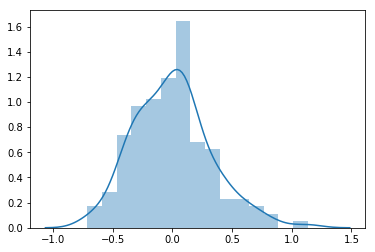

In [138]:
sns.distplot(Residual, bins =15)

Error term is normally distributed.

#### Making Predictions:

In [141]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [142]:
y_test = df_test.pop('price')
X_test = df_test

In [144]:
final_cols = X6.columns

In [145]:
X_test_model6= X_test[final_cols]
X_test_model6.head()

,carwidth,enginesize,enginelocation_rear,enginetype_rotor,car_company_bmw,car_company_renault
160,-0.652569,-0.660242,0,0,0,0
186,-0.154030,-0.390836,0,0,0,0
59,0.299187,-0.072447,0,0,0,0
165,-0.833856,-0.660242,0,0,0,0
140,-0.924500,-0.415328,0,0,0,0


In [146]:
X_test_sm = sm.add_constant(X_test_model6)

In [147]:
y_pred = Model_6.predict(X_test_sm)

In [148]:
y_pred.head()

160   -0.678030
186   -0.339498
59     0.006498
165   -0.750148
140   -0.658743
dtype: float64

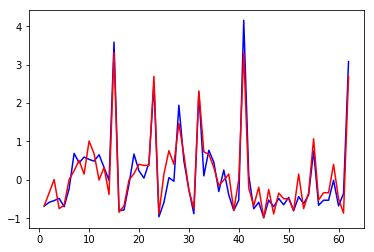

In [152]:
c = [i for i in range(1,63,1)]
plt.plot(c, y_test,color = 'Blue')
plt.plot(c, y_pred,color = 'red')
plt.xlabel()
plt.ylabel()

Text(0, 0.5, 'y_pred')

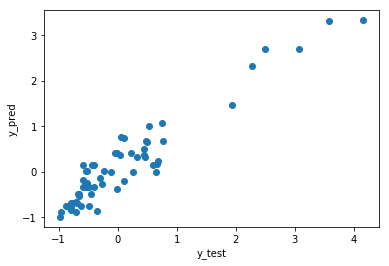

In [156]:
plt.scatter(y_test, y_pred)
plt.xlabel('y_test')
plt.ylabel('y_pred')

Though the model is doing good at the beginning, still there are few high values which model is not able to explain.

#### Evaluation:

In [160]:
r_squ = r2_score(y_test,y_pred)
r_squ

0.8997211435182687

So linear equation for price can be given as:
𝑝𝑟𝑖𝑐𝑒 = -0.0748  + 0.3978 × carwidth + 0.5204 x enginesize + enginelocation_rear x  2.0419 +
0.7640 xenginetype_rotor + 1.1294 Xcar_company_bmw - 0.5879 x car_company_renault

#### Which variables are significant in predicting the price of a car?

    enginesize
    carwidth
    enginetype_rotor
    car_company_bmw
    enginelocation_rear
    car_company_renault (-vely)
    
These are the variables that are significant in predicting the price of a car.